# Results of the RS Experiment are presented in this notebook

### Collected data is cleaned and analyzed

In [1]:
import os, json
import pandas as pd
from pandas.io.json import json_normalize
import seaborn as sns

path_to_json = 'data/user_sessions/'
json_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json')]

In [2]:
# dataframes are defined
recommendations = pd.DataFrame(columns=['recommendations'])
df = pd.DataFrame(columns=['username',
          'ts',
          'baseline',
          'final_profile',
          'valid_tags',
          'invalid_tags',
          'valid_artists',
          'invalid_artists',
          'tags_clicks',
          'artists_clicks',
          'zero_all_clicks',
          'boost_up_clicks',
          'boost_down_clicks',
          'clear_data_clicks',
          'plays_row',
          'plays_data',
          'recommendations'])

# json normalized, appending to dataframes
for index, js in enumerate(json_files):
    with open(os.path.join(path_to_json, js)) as json_file:
        j = json.load(json_file)  
        user = json_normalize(j)
        recs = json_normalize(j['recommendations'])
        recs = json_normalize(data=j, record_path='recommendations', 
                            meta=['username', 'baseline'])
        recommendations = recommendations.append(recs)
        df = df.append(user)

/Users/dlesz/miniconda3/envs/recsys/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [3]:
# removing redudant column and renaming the right one
recommendations = recommendations.drop('recommendations', axis=1)
recommendations = recommendations.rename(columns={ recommendations.columns[0]: "recommendations" })

### Clicks to be sumed are defined as integers.

In this case `tags_clicks` and `artists_clicks` are ommited, thus the `total_clicks` defined below are only applicable for the interactive recommender `interactive_df`

In [4]:
# setting the datatype to integer
df['boost_down_clicks'] = df['boost_down_clicks'].astype(int)
df['boost_up_clicks'] = df['boost_up_clicks'].astype(int)
df['zero_all_clicks'] = df['zero_all_clicks'].astype(int)
#df['clear_data_clicks'] = df['clear_data_clicks'].astype(int)
#df['final_profile'] = df['final_profile'].astype(int)
#df['artists_clicks'] = df['artists_clicks'].astype(int)
#df['tags_clicks'] = df['tags_clicks'].astype(int)

# etc... TODO finish this

In [5]:
df['total_clicks'] = df.drop('final_profile', axis=1).sum(axis=1)

In [6]:
df.sort_values(by=['total_clicks'], ascending=False)

,artists_clicks,baseline,boost_down_clicks,boost_up_clicks,clear_data_clicks,final_profile,invalid_artists,invalid_tags,plays_data,plays_row,...,recommendations.wu-tang clan,recommendations.xavier rudd,recommendations.yeah yeah yeahs,tags_clicks,ts,username,valid_artists,valid_tags,zero_all_clicks,total_clicks
0,2,False,5,39,0,207917,"[patty shukla, american, female vocalists]",,"[400, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2...","[30 seconds to mars, 36 crazyfists, apocalypti...",...,NaN,NaN,NaN,0,1544509680.5425403,cc54d850-1067-47b1-8363-1ac3c2a16ca3,"[katie melua, michael bubble, enya]",,3,47
0,5,False,0,44,0,168955,"[kygo, imagine dragons, imagine dragons]",[],"[0, 400, 200, 0, 0, 0, 0, 200, 200, 600, 0, 20...","[4 strings, 50 cent, akon, akon & eminem, alex...",...,NaN,NaN,NaN,1,1545220757.6722255,2a59b93f-2780-4365-99aa-1db78d9d864b,"[beatles, enrique iglesias, metallica, eminem,...","[rock, pop, hip hop, blues, dance]",1,45
0,2,False,0,31,0,353703,[],,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[112, 2pac, 50 cent, adam tensta, barry white,...",...,NaN,NaN,NaN,0,1545053861.29751,67d1f463-cc1f-400f-8099-b0f28352596c,"[kings of leon, usher, rihana]",,1,32
0,3,False,0,30,1,162989,[frank ocean],,"[800, 600, 0, 200, 0, 0, 0, 0, 0, 0, 200, 0, 0...","[alicia keys, amy winehouse, angie stone, anne...",...,NaN,NaN,NaN,2,1544474924.7875326,a0ebb593-7f11-4c57-a527-1bd40f575610,"[beyonce, tina dickow, the beatles]",,1,31
0,8,False,2,25,4,20298,[],,"[0, 0, 0, 0, 0, 800, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[30 seconds to mars, a day to remember, a plea...",...,NaN,NaN,NaN,0,1544369991.6171904,3ae42cf7-d1ec-49c1-8625-cff5679a176a,"[parkway drive, oceano]",,4,31
0,1,False,0,26,0,159795,[hellacopters],,"[0, 0, 400, 200, 0, 0, 0, 0, 200, 0, 0, 0, 0, ...","[air, amon tobin, arctic monkeys, bad religion...",...,NaN,NaN,NaN,0,1544606266.9286482,d6dc0b5a-6871-4467-a38a-d1f4bd89cc7f,"[zeke, the hives]",,1,27
0,1,False,17,8,1,225210,[],[],"[204, 11, 6, 8, 28, 7, 5, 9, 207, 9, 18, 13, 5...","[air, angus & julia stone, animal collective, ...",...,NaN,NaN,NaN,2,1544369691.7294967,af834f49-b43d-459a-9b9a-ce0f45e06b35,"[timbuktu, promoe, nightmares on wax, stereo mcs]","[singer-songwriter, danish]",0,25
0,6,False,0,19,1,69118,[],,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[al di meola, albert king, big brother & the h...",...,NaN,NaN,NaN,0,1544872746.9086714,13daec83-d38f-432a-a726-55f95416ac47,"[jimi hendrix, manu chao, the doors]",,1,20
0,6,False,0,17,2,258493,[],,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 600...","[7l & esoteric, army of the pharaohs, big left...",...,"[0.65773738, hip-hop, rap, hip hop, <a href=""...",NaN,NaN,0,1544690860.472218,073c9a80-e47d-40dc-a8b5-0b4460199258,"[immortal technique, necro]",,1,18
0,4,False,3,12,1,169808,[],,"[74, 77, 41, 65, 247, 114, 534, 199, 249, 38, ...","[[unknown], akon, alesha dixon, black eyed pea...",...,NaN,NaN,NaN,0,1544614536.7999828,f519452a-c746-4e08-8e5f-79151332102a,"[the lonely island, eminem, nephew]",,0,15


In [7]:
baseline = df[df['baseline']=='True']
interactive = df[df['baseline']=='False']

In [8]:
print("baseline participants: "+str(baseline.username.nunique()))
print("interactive participants: "+str(interactive.username.nunique()))

baseline participants: 28
interactive participants: 23


In [9]:
interactive = interactive.sort_values(by=['total_clicks'], ascending=False)

# This view below shows the participants (8 out of 23) who failed to adjust recommendations (interactive)  

In [10]:
# this view holds the interactive participants who interacted with the recommendations with at most 1 click
interactive_false_participants = interactive[interactive['total_clicks']<= 1]
interactive_false_participants

,artists_clicks,baseline,boost_down_clicks,boost_up_clicks,clear_data_clicks,final_profile,invalid_artists,invalid_tags,plays_data,plays_row,...,recommendations.wu-tang clan,recommendations.xavier rudd,recommendations.yeah yeah yeahs,tags_clicks,ts,username,valid_artists,valid_tags,zero_all_clicks,total_clicks
0,0,False,0,1,0,199894,,[],"[663, 1161, 657, 640, 509, 412, 459, 1182, 304...","[acoustic alchemy, antônio carlos jobim, areth...",...,NaN,NaN,NaN,5,1544387108.9733348,b687fcaa-ea3b-46f2-8a30-3dac13487380,,"[heavy metal, mpb, thrash, bossa, bossa nova, ...",0,1
0,1,False,0,0,0,86858,[],,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[unknown], aaliyah, anouk, armik, atb, bebel ...",...,NaN,NaN,NaN,0,1544518250.915263,5ec64cda-0d9e-446f-8bba-aa4be8aeb572,"[coldplay, rihanna, gipsy kings]",,1,1
0,0,False,0,1,0,96627,,[r&b and pop],"[270, 14, 16, 24, 50, 29, 45, 32, 13, 52, 64, ...","[abba, ace of base, amy winehouse, atomic cat,...",...,NaN,NaN,NaN,2,1545000473.9775956,79997a58-7689-4ab6-bfc9-b7c4637f42f9,,"[rock, soft rock, hiphop]",0,1
0,2,False,0,0,1,130720,[],[],"[69, 73, 149, 75, 85, 103, 60, 125, 72, 84, 15...","[akon, amy winehouse, augustana, avril lavigne...",...,NaN,NaN,NaN,2,1544694597.9853432,c279d58d-e1f2-4b20-8489-d5569cff6a97,"[the xx, red hot chili peppers]","[indie, hip hop]",0,0
0,2,False,0,0,0,321898,[],[],"[22, 21, 12, 14, 109, 173, 10, 8, 23, 122, 22,...","[agnes, alesha dixon, anarbor, beyoncé, black ...",...,NaN,NaN,NaN,1,1544629584.944523,212c2882-4ca5-4622-96ce-23a607ded11e,"[live, incubus, live, incubus, dave matthews]","[rock, classical, jazz]",0,0
0,2,False,0,0,0,195597,"[eaggerstunn, fastpoholmen]",,"[55, 17, 47, 31, 34, 22, 89, 62, 81, 41, 58, 9...","[2 vibez, a rocket to the moon, adiam dymott, ...",...,NaN,NaN,NaN,0,1544365796.6894782,0111918b-0753-46e7-bf67-51f7651fdf16,"[timbuktu, promoe]",,0,0
0,3,False,0,0,0,283423,[],[],"[315, 518, 177, 237, 221, 197, 178, 205, 803, ...","[50 cent, a tribe called quest, andre 3000, an...",...,NaN,NaN,NaN,2,1544461070.948438,df37bafb-db0b-4202-827b-9e1523ee0f3d,"[eminem, sean price, apollo brown, four tet, d...","[hip hop, electronic, hip hop, techno, rap]",0,0
0,0,False,0,0,0,160873,,[],"[176, 143, 156, 198, 167, 163, 372, 144, 447, ...","[108, 88 fingers louie, agnostic front, alkali...",...,NaN,NaN,NaN,1,1544438716.8460903,0d1c89c7-8c72-4c7e-8626-815c55a20d11,,"[metal, hardcore, hip-hop]",0,0


In [11]:
interactive_true = interactive[interactive['total_clicks']> 1]

In [12]:
interactive_true

,artists_clicks,baseline,boost_down_clicks,boost_up_clicks,clear_data_clicks,final_profile,invalid_artists,invalid_tags,plays_data,plays_row,...,recommendations.wu-tang clan,recommendations.xavier rudd,recommendations.yeah yeah yeahs,tags_clicks,ts,username,valid_artists,valid_tags,zero_all_clicks,total_clicks
0,2,False,5,39,0,207917,"[patty shukla, american, female vocalists]",,"[400, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2...","[30 seconds to mars, 36 crazyfists, apocalypti...",...,NaN,NaN,NaN,0,1544509680.5425403,cc54d850-1067-47b1-8363-1ac3c2a16ca3,"[katie melua, michael bubble, enya]",,3,47
0,5,False,0,44,0,168955,"[kygo, imagine dragons, imagine dragons]",[],"[0, 400, 200, 0, 0, 0, 0, 200, 200, 600, 0, 20...","[4 strings, 50 cent, akon, akon & eminem, alex...",...,NaN,NaN,NaN,1,1545220757.6722255,2a59b93f-2780-4365-99aa-1db78d9d864b,"[beatles, enrique iglesias, metallica, eminem,...","[rock, pop, hip hop, blues, dance]",1,45
0,2,False,0,31,0,353703,[],,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[112, 2pac, 50 cent, adam tensta, barry white,...",...,NaN,NaN,NaN,0,1545053861.29751,67d1f463-cc1f-400f-8099-b0f28352596c,"[kings of leon, usher, rihana]",,1,32
0,8,False,2,25,4,20298,[],,"[0, 0, 0, 0, 0, 800, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[30 seconds to mars, a day to remember, a plea...",...,NaN,NaN,NaN,0,1544369991.6171904,3ae42cf7-d1ec-49c1-8625-cff5679a176a,"[parkway drive, oceano]",,4,31
0,3,False,0,30,1,162989,[frank ocean],,"[800, 600, 0, 200, 0, 0, 0, 0, 0, 0, 200, 0, 0...","[alicia keys, amy winehouse, angie stone, anne...",...,NaN,NaN,NaN,2,1544474924.7875326,a0ebb593-7f11-4c57-a527-1bd40f575610,"[beyonce, tina dickow, the beatles]",,1,31
0,1,False,0,26,0,159795,[hellacopters],,"[0, 0, 400, 200, 0, 0, 0, 0, 200, 0, 0, 0, 0, ...","[air, amon tobin, arctic monkeys, bad religion...",...,NaN,NaN,NaN,0,1544606266.9286482,d6dc0b5a-6871-4467-a38a-d1f4bd89cc7f,"[zeke, the hives]",,1,27
0,1,False,17,8,1,225210,[],[],"[204, 11, 6, 8, 28, 7, 5, 9, 207, 9, 18, 13, 5...","[air, angus & julia stone, animal collective, ...",...,NaN,NaN,NaN,2,1544369691.7294967,af834f49-b43d-459a-9b9a-ce0f45e06b35,"[timbuktu, promoe, nightmares on wax, stereo mcs]","[singer-songwriter, danish]",0,25
0,6,False,0,19,1,69118,[],,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[al di meola, albert king, big brother & the h...",...,NaN,NaN,NaN,0,1544872746.9086714,13daec83-d38f-432a-a726-55f95416ac47,"[jimi hendrix, manu chao, the doors]",,1,20
0,6,False,0,17,2,258493,[],,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 600...","[7l & esoteric, army of the pharaohs, big left...",...,"[0.65773738, hip-hop, rap, hip hop, <a href=""...",NaN,NaN,0,1544690860.472218,073c9a80-e47d-40dc-a8b5-0b4460199258,"[immortal technique, necro]",,1,18
0,4,False,3,12,1,169808,[],,"[74, 77, 41, 65, 247, 114, 534, 199, 249, 38, ...","[[unknown], akon, alesha dixon, black eyed pea...",...,NaN,NaN,NaN,0,1544614536.7999828,f519452a-c746-4e08-8e5f-79151332102a,"[the lonely island, eminem, nephew]",,0,15


# Loading survey data

In [13]:
survey = pd.read_csv('data/recsys survey.csv')

In [14]:
# renaming user_id column to username
survey = survey.rename(columns={ survey.columns[1]: "username" })

In [15]:
# dropping timestamp
survey = survey.drop(['Timestamp'], axis=1)

In [16]:
# manually cleaning the one and only misspelled userId
df = df.replace('session id: d6dc0b5a-6871-4467-a38a-d1f4bd89cc7f ', 'd6dc0b5a-6871-4467-a38a-d1f4bd89cc7f')
survey = survey.replace('session id: d6dc0b5a-6871-4467-a38a-d1f4bd89cc7f ', 'd6dc0b5a-6871-4467-a38a-d1f4bd89cc7f')

In [17]:
# merging survey with the session dataframes into satisfaction rate "sr"
interactive_sr = survey.merge(interactive_true, how='inner')
baseline_sr = survey.merge(baseline, how='inner')

In [18]:
interactive_sr.describe()

,The music profile I was given represented my music taste,The tags function (option A) helped me find a representative music profile,The artist function (option B) helped me find a representative music profile,The recommendations inspired me,Unnamed: 9,The recommendations were surprising,The recommendations had a strong relation to the music profile,boost_down_clicks,boost_up_clicks,zero_all_clicks,total_clicks
count,12.000000,6.000000,11.000000,12.000000,0.0,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,4.083333,2.833333,4.363636,3.916667,NaN,3.166667,4.333333,2.833333,19.500000,1.166667,23.500000
std,0.900337,1.329160,0.809040,0.996205,NaN,0.937437,1.230915,4.821040,10.561508,1.193416,10.723805
min,3.000000,1.000000,3.000000,2.000000,NaN,2.000000,1.000000,0.000000,8.000000,0.000000,11.000000
25%,3.000000,2.250000,4.000000,3.000000,NaN,2.750000,4.000000,0.000000,10.250000,0.750000,14.500000
50%,4.000000,3.000000,5.000000,4.000000,NaN,3.000000,5.000000,1.000000,18.000000,1.000000,22.500000
75%,5.000000,3.000000,5.000000,5.000000,NaN,4.000000,5.000000,3.250000,27.000000,1.000000,31.000000
max,5.000000,5.000000,5.000000,5.000000,NaN,5.000000,5.000000,17.000000,39.000000,4.000000,47.000000


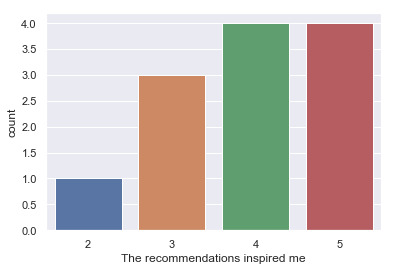

In [19]:
sns.set(style="darkgrid")
ax = sns.countplot(x="The recommendations inspired me", data=interactive_sr)

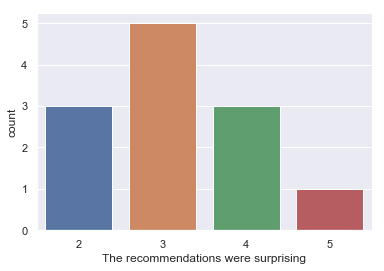

In [20]:
ax = sns.countplot(x="The recommendations were surprising", data=interactive_sr)

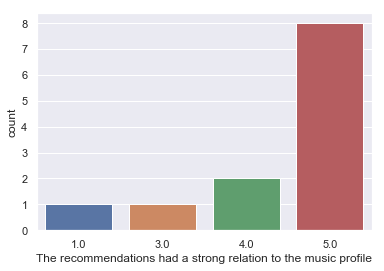

In [21]:
ax = sns.countplot(x="The recommendations had a strong relation to the music profile", data=interactive_sr)

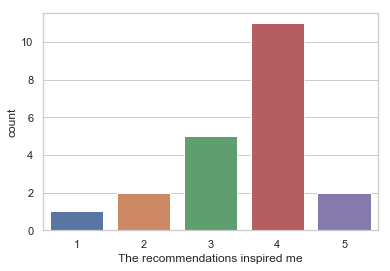

In [22]:
sns.set(style="whitegrid")
ax = sns.countplot(x="The recommendations inspired me", data=baseline_sr)

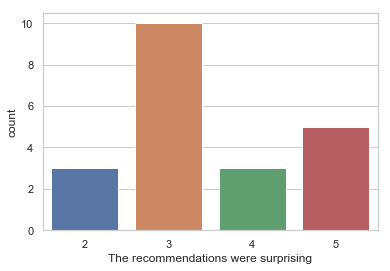

In [23]:
ax = sns.countplot(x="The recommendations were surprising", data=baseline_sr)

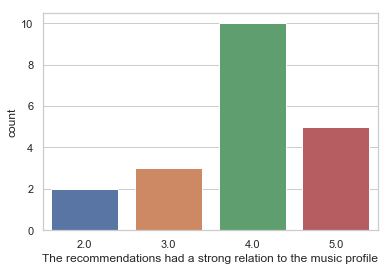

In [24]:
ax = sns.countplot(x="The recommendations had a strong relation to the music profile", data=baseline_sr)

In [25]:
#sns.catplot(x="baseline", y="The recommendations inspired me",hue="baseline" ,kind="swarm", data=interactive_sr.append(baseline_sr));
#sns.catplot(x="day", y="total_bill", hue="sex", kind="swarm", data=);

In [26]:
all_sr = interactive_sr.append(baseline_sr)

In [27]:
all_sr = all_sr.drop(columns=['username'])

/Users/dlesz/miniconda3/envs/recsys/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


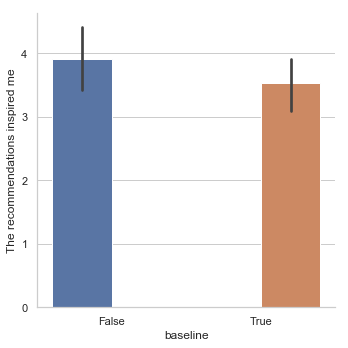

In [28]:
#sns.catplot(y="The music profile I was given represented my music taste", x="baseline", hue="baseline", kind="bar", data=all_sr);
#sns.catplot(y="The tags function (option A) helped me find a representative music profile", x="baseline", hue="baseline", kind="bar", data=all_sr);
#sns.catplot(y="The artist function (option B) helped me find a representative music profile", x="baseline", hue="baseline", kind="bar", data=all_sr);
sns.catplot(y="The recommendations inspired me", x="baseline", hue="baseline", kind="bar", data=all_sr);
#sns.catplot(y="The recommendations were surprising", x="baseline", hue="baseline", kind="bar", data=all_sr);
#sns.catplot(y="The recommendations had a strong relation to the music profile", x="baseline", hue="baseline", kind="bar", data=all_sr);

In [29]:
baseline_sr.describe()

,The music profile I was given represented my music taste,The tags function (option A) helped me find a representative music profile,The artist function (option B) helped me find a representative music profile,The recommendations inspired me,Unnamed: 9,The recommendations were surprising,The recommendations had a strong relation to the music profile,boost_down_clicks,boost_up_clicks,zero_all_clicks,total_clicks
count,21.000000,15.000000,14.000000,21.000000,0.0,21.000000,20.00000,21.0,21.0,21.0,21.0
mean,3.714286,3.200000,3.785714,3.523810,NaN,3.476190,3.90000,0.0,0.0,0.0,0.0
std,0.717137,0.941124,1.050902,0.980767,NaN,1.030488,0.91191,0.0,0.0,0.0,0.0
min,3.000000,1.000000,1.000000,1.000000,NaN,2.000000,2.00000,0.0,0.0,0.0,0.0
25%,3.000000,3.000000,3.250000,3.000000,NaN,3.000000,3.75000,0.0,0.0,0.0,0.0
50%,4.000000,3.000000,4.000000,4.000000,NaN,3.000000,4.00000,0.0,0.0,0.0,0.0
75%,4.000000,4.000000,4.000000,4.000000,NaN,4.000000,4.25000,0.0,0.0,0.0,0.0
max,5.000000,4.000000,5.000000,5.000000,NaN,5.000000,5.00000,0.0,0.0,0.0,0.0


In [30]:
interactive_sr.describe()

,The music profile I was given represented my music taste,The tags function (option A) helped me find a representative music profile,The artist function (option B) helped me find a representative music profile,The recommendations inspired me,Unnamed: 9,The recommendations were surprising,The recommendations had a strong relation to the music profile,boost_down_clicks,boost_up_clicks,zero_all_clicks,total_clicks
count,12.000000,6.000000,11.000000,12.000000,0.0,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,4.083333,2.833333,4.363636,3.916667,NaN,3.166667,4.333333,2.833333,19.500000,1.166667,23.500000
std,0.900337,1.329160,0.809040,0.996205,NaN,0.937437,1.230915,4.821040,10.561508,1.193416,10.723805
min,3.000000,1.000000,3.000000,2.000000,NaN,2.000000,1.000000,0.000000,8.000000,0.000000,11.000000
25%,3.000000,2.250000,4.000000,3.000000,NaN,2.750000,4.000000,0.000000,10.250000,0.750000,14.500000
50%,4.000000,3.000000,5.000000,4.000000,NaN,3.000000,5.000000,1.000000,18.000000,1.000000,22.500000
75%,5.000000,3.000000,5.000000,5.000000,NaN,4.000000,5.000000,3.250000,27.000000,1.000000,31.000000
max,5.000000,5.000000,5.000000,5.000000,NaN,5.000000,5.000000,17.000000,39.000000,4.000000,47.000000


___

#  Example lookup

In [5]:
# show recommendations for a given username
recommendations[recommendations['username']=='b687fcaa-ea3b-46f2-8a30-3dac13487380']
# show survey results of the user here:


,recommendations,username,baseline
0,jack johnson,b687fcaa-ea3b-46f2-8a30-3dac13487380,False
1,sérgio mendes,b687fcaa-ea3b-46f2-8a30-3dac13487380,False
2,santana,b687fcaa-ea3b-46f2-8a30-3dac13487380,False
3,john coltrane,b687fcaa-ea3b-46f2-8a30-3dac13487380,False
4,daft punk,b687fcaa-ea3b-46f2-8a30-3dac13487380,False
5,michael jackson,b687fcaa-ea3b-46f2-8a30-3dac13487380,False
6,maysa,b687fcaa-ea3b-46f2-8a30-3dac13487380,False
7,bossacucanova,b687fcaa-ea3b-46f2-8a30-3dac13487380,False
8,ed motta,b687fcaa-ea3b-46f2-8a30-3dac13487380,False
9,bob marley,b687fcaa-ea3b-46f2-8a30-3dac13487380,False


___

## if time allows conduct t-test
https://stats.stackexchange.com/questions/63856/power-of-the-t-test-under-unequal-sample-sizes